$\color{blue}{\huge {\text{3. Introduction to Keras and TensorFlow}}}$

<h3><span style="color:black">3.1 What is TensorFlow?</span></h3>

It’s important to keep in mind that TensorFlow is much more than a single library. It’s really a platform, home to a vast ecosystem of components, some developed by Google, some developed by third-parties. For instance, there’s TF-Agents for reinforcement learning research, TFX for industry-strength machine learning workflow management, TF-Serving for production deployment, there’s the TF-Hub repository of pretrained models...​ Together, these components cover a very wide range of use cases, from cutting-edge research to large-scale production applications.

<h3><span style="color:black">3.2. What is Keras?</span></h3>

Keras is a deep-learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep-learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

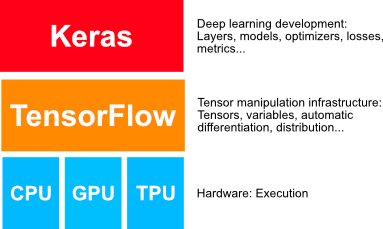

In [70]:
from IPython.display import Image
Image(filename= "Keras_block_diagram.jpg")

<h3><span style="color:black">3.3 Keras and TensorFlow: A brief history</span></h3>

By late 2017, a majority of TensorFlow users were using it through Keras or in combination with Keras. In 2018, the TensorFlow leadership picked Keras as TensorFlow’s official high-level API. As a result, the Keras API is front and center in TensorFlow 2.0, released in September 2019—an extensive redesign of TensorFlow and Keras that takes into account over four years of user feedback and technical progress.

<h3><span style="color:black">3.4. Setting up a deep-learning workspace</span></h3>

#### 3.4.1 Jupyter Notebooks: the preferred way to run deep-learning experiments

<h3><span style="color:black">3.5 First steps with TensorFlow</span></h3>

First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:<br>
• <b><i><span style="color:blue">Tensors</span></i></b> including special tensors that store the network’s state <b><i><span style="color:blue">variables</span></i></b><br>
• <b><i><span style="color:blue">Tensor operations</span></i></b> such as addition, relu, matmul<br>
• <b><i><span style="color:blue">Backpropogation </span></i></b>a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object)

Second, high-level deep learning concepts. This translates to Keras APIs:<br>
• <b><i><span style="color:blue">Layers</span></i></b> which are combined into a <b><i><span style="color:blue">model</span></i></b><br>
• <b><i><span style="color:blue">A loss function</span></i></b>, which defines the feedback signal used for learning<br>
• <b><i><span style="color:blue">An optimizer</span></i></b>, which determines how learning proceeds<br>
• <b><i><span style="color:blue">Metrics</span></i></b> to evaluate model performance, such as accuracy<br>
• <b><i><span style="color:blue">A training loop</span></i></b> that performs mini–batch stochastic gradient descent<br>

#### Constant tensors and variables
To do anything in TensorFlow, we’re going to need some tensors. Tensors need to be created with some initial value, so common ways to create tensors are:

#### 3.1 All-ones or all-zeros tensors

In [71]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape = (2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#### 3.2 Random tensors

In [72]:
x = tf.random.normal(shape = (10,3), mean = 0., stddev= 1.)
print(x)
# equivalent to np.random.normal(size = (10,3), loc = 0

x = tf.random.uniform(shape=(5,4), minval=0., maxval=1.)
print(x)
# equivalent to np.random.uniform(size = (3,1), low = 0., high = 1.).

tf.Tensor(
[[ 0.3723929  -0.995834   -0.16139531]
 [ 1.1480775   0.4464804   0.20565645]
 [ 1.3932528  -0.7815628   0.9815448 ]
 [-0.97874063  0.45872942  2.2332318 ]
 [-0.70036453  0.21866576 -0.8215301 ]
 [-0.4588244   2.0317934  -0.31877384]
 [ 0.873248   -0.5651184  -0.27673104]
 [-2.120369    0.9452678  -0.7496644 ]
 [-0.32418412 -0.75756615  1.4976872 ]
 [-0.66054237 -0.7998919   0.88642156]], shape=(10, 3), dtype=float32)
tf.Tensor(
[[0.35029602 0.33226645 0.82005656 0.3364613 ]
 [0.5083697  0.25462067 0.20076478 0.29664767]
 [0.88175356 0.00635111 0.5981355  0.5916188 ]
 [0.53155744 0.84500265 0.01792789 0.70635223]
 [0.45231688 0.71933544 0.6225573  0.61733925]], shape=(5, 4), dtype=float32)


#### 3.3 NumPy arrays are assignable

In [73]:
import numpy as np
x = np.ones(shape = (2,2))
print(x[0,0])

1.0


#### 3.4  Note: Tensors are <b>NOT</b> assignable!

In [74]:
x = tf.ones(shape=(2,2))
print(x[0,0]) # returns an error

tf.Tensor(1.0, shape=(), dtype=float32)


To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it, then? That’s where variables come in. tf.Variable is the class meant to manage modifiable state in TensorFlow. You’ve already briefly seen it in action in the training loop implementation at the end of chapter 2.

#### 3.5 Creating a Variable

In [75]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v) # that worked!

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.4447114 ],
       [ 0.53895116],
       [-1.3773402 ]], dtype=float32)>


The state of a variable can be modified via ita `assign` method
#### 3.6 Assigning a value to a variable

In [76]:
v.assign(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Similarly, assign_add and assign_sub are efficient equivalents of += and -=:
#### 3.8 Using assign_add

In [77]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

#### 3.9 A few basic math operations in Tensorflow

In [78]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


<b>A Second Look at the `GradientTape` API<br></b><br>
So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs. Just open a GradientTape scope, apply some computation to one or several input tensors, and retrieve the
gradient of the result with respect to the inputs.

In [79]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights: gradients = tape.gradient(loss, weights).

So far, you’ve only seen the case where the input tensors in tape.gradient() were TensorFlow variables. It’s actually possible for these inputs to be any arbitrary tensor. However, only <b>trainable variables</b> are being tracked by default. With a constant tensor, you’d have to manually mark it as being tracked, by calling tape.watch() on it:

#### 3.11 Using the Gradient Tape with constant tensor inputs

In [80]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


The gradient tape is a powerful utility, even capable of computing <i>second-order gradients</i>, that is to say, the gradient of a gradient. For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.<br>
If you measure the position of a falling apple along a vertical axis over time, and find that it verifies position(time) = 4.9 * time ** 2, what is its acceleration? Let’s use two nested gradient tapes to find out.

In [81]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9* time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed.eval)
print(acceleration.eval) # 9.8

<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>
<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(), dtype=float32, numpy=9.8>>


<b>An end-to-end example: A Linear Classifier in Pure Tensorflow<br></b><br>

In a machine learning job interview, you may be asked to implement a linear classifier from scratch in TensorFlow: a very simple task that serves as a filter between candidates who have some minimal machine learning background, and those who don’t.<br>
First, let’s come up with some nicely linearly-separable synthetic data to work with: two classes of points in a 2D plane.

#### Generating two classes of random points in a 2D plane

In [82]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
positve_samples = np.random.multivariate_normal(
    mean = [3,0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)

Negative sample Generate the first class of points: 1000 random 2D points with specified "mean" and "covariance matrix". Intuitively, the "covariance matrix" describes the shape of the point cloud pictured in the figure below, and the "mean" describes its position in the plane. cov=[[1, 0.5],[0.5, 1]] corresponds to "an oval-like point cloud oriented from bottom left to top right".<br>
Positive samples Generate the other class of points with a difference mean and the same covariance matrix (point cloud with a different position and the same shape).

`negative_samples` and `positive_samples` are both arrays with shape (1000,2). Let's stack them into a single array with shape (2000,2)

In [83]:
inputs = np.vstack((negative_samples, positve_samples)).astype(np.float32)

Let’s generate the corresponding target labels, an array of zeros and ones of shape (2000, 1), where `targets[i, 0]` is 0 if `inputs[i]` belongs to class 0 (and inversely):

In [84]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

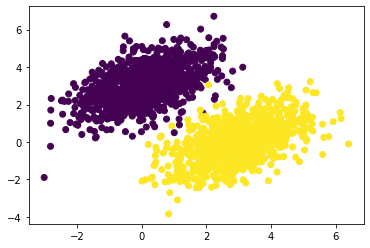

In [85]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c = targets[:,0])
plt.show()

Now, let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.<br>
Let’s create our variables W and b, initialized with random values and with zeros respectively:

In [86]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape = (output_dim)))

The inputs will be 2D points.<br>
The output predictions will be a single score per sample (close to 0 if the sample is predicted to be in class 0, and close to 1 if the sample is predicted to be in class 1).
#### The Forward Pass Function

In [87]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for given input point [x, y], its prediction value is: prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.<br>
<br>Here's our loss fuction:
#### 3.19 The Mean Squared Error Loss Function:

In [88]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

`per_sample_losses` will be a tensor of with the same shape as `targets` and `predictions`, containing per-sample loss scores
We need to average these per-sample loss scores into a single scalar loss value: this is what `reduce_mean` does.
#### 3.20 The Training Step Function

In [89]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### The Batch Training Loop

In [90]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 0.3635
loss at step 1: 0.1354
loss at step 2: 0.0976
loss at step 3: 0.0870
loss at step 4: 0.0810
loss at step 5: 0.0760
loss at step 6: 0.0716
loss at step 7: 0.0676
loss at step 8: 0.0639
loss at step 9: 0.0606
loss at step 10: 0.0575
loss at step 11: 0.0547
loss at step 12: 0.0521
loss at step 13: 0.0498
loss at step 14: 0.0477
loss at step 15: 0.0457
loss at step 16: 0.0440
loss at step 17: 0.0423
loss at step 18: 0.0408
loss at step 19: 0.0395
loss at step 20: 0.0383
loss at step 21: 0.0371
loss at step 22: 0.0361
loss at step 23: 0.0351
loss at step 24: 0.0343
loss at step 25: 0.0335
loss at step 26: 0.0328
loss at step 27: 0.0321
loss at step 28: 0.0315
loss at step 29: 0.0310
loss at step 30: 0.0305
loss at step 31: 0.0300
loss at step 32: 0.0296
loss at step 33: 0.0292
loss at step 34: 0.0289
loss at step 35: 0.0286
loss at step 36: 0.0283
loss at step 37: 0.0280
loss at step 38: 0.0278
loss at step 39: 0.0275



After 40 steps, the training loss seems to have stabilized around 0.025. Let’s plot how our linear model classifies the training data points. Because our targets are zeros and ones, a given input point will be classified as "0" if its prediction value is below 0.5, and as "1" if it is above 0.5:

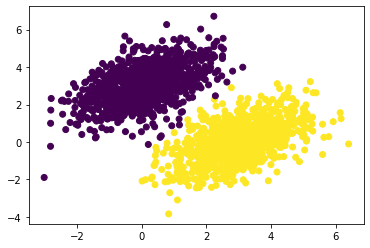

In [91]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line, class 1, below the line, class 0. You may be used to seeing line equations in
the format y = a * x + b; in the same format, our line becomes: y = - w1 / w2 * x + (0.5 - b) / w2.<br><br>
Let’s plot this line:

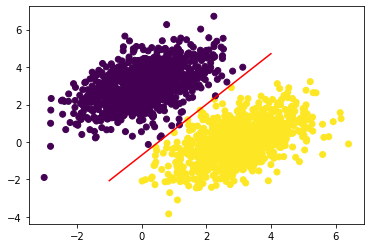

In [92]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)

<h3><span style="color:black">3.6. Anatomy of a Neural Network: Understanding Core Keras APIs</span></h3>

#### 3.6.1 Layers: The building blocks of deep learning
Different types of layers are appropriate for different tensor formats and different types of data processing.<br>
 <table>
  <tr>
    <th>
    <th>Vector Data</th>
    <th>Sequence Data</th>
    <th>Image</th>
  </tr>
  <tr>
    <th> Type
    <td>2D tensor (`samples, features`)</td>
    <td>3D tensor (`samples, timesteps, features`)</td>
    <td>4D tensor</td>
  </tr>
  <tr>
    <th>Processed by
    <td>densely connected layers</td>
    <td>Recurreng layers such as LSTM or 1D convolution layer (`Conv1D`)</td>
    <td>2D convolutoin layers (`Conv2D`)</td>
  </tr>
</table>

The base <span style="font-variant:small-caps;">Layer</span> in Keras<br>
A simple API should have a single abstraction around which everything is centered. In Keras, that’s the Layer class. Everything in Keras is either a Layer or something that closely interacts with a Layer.
A Layer is an object that encapsulates some state (weights) and some computation (a forward pass). The weights are typically defined in a build()

In [93]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape = (input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape = (self.units,), initializer = "zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

All Keras layers inherit from the base <span style="font-variant:small-caps;">Layer</span> class.<br>
Weight creation takes place in the `build()` method.<br>
`add_weight` is a shortcut method for creating weights. It is also possible to create standalone variables and assign them as layer attributes, like: `self.W = tf.Variable(tf.random.uniform(w_shape))`.<br>
We define the forward pass computation in the `call()` method.

Once instantiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [94]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)
(2, 32)

(2, 32)


(2, 32)

#### Automatic Shape Inference:Building Layers on the Fly
Just like with LEGO bricks, you can only "clip" together layers that are compatible. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape.

#### 3.6.2 From Layers to Models
A deep-learning model is a graph of layers. In Keras, that’s the `Model` class. For now, you’ve only seen `Sequential` models (a subclass of `Model`), which are simple stack of layers, mapping a single input to a single output. But as you move forward, you’ll be exposed to a much broader variety of network topologies. Some common ones are:<br><br>
• Two-branch networks<br>• Multihead networks<br>• Residual connections

There are generally two ways of building such models in Keras: you could directly subclass the `Model` class, or you could use the Functional API, which lets you do more with less code. We’ll cover both approaches in chapter 7.

The topology of a model defines a hypothesis space. You may remember that in chapter 1, we described machine learning as "searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal." By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

Picking the right network architecture is more an art than a science; and although there are some best practices and principles you can rely on, only practice can help you become a proper neural-network architect. The next few chapters will both teach you explicit principles for building neural networks and help you develop intuition as to what works or doesn’t work for specific problems. You’ll build a solid intuition about what type of model architectures work for different kinds of problems, how to build these networks in practice, how to pick the right learning configuration, and how to tweak a model until it yields the results you want to see.
### 3.6.3 The "compile" step: Configuring the learning process

Once the model architecture is defined, you still have to choose three mor things:<br>
• <b><i><span style="color:blue">Loss function</span></i></b> — The quantity that will be minimized during training. It represents a measure of success for the task at hand.<br>
• <b><i><span style="color:blue">Optimizer</span></i></b>—Determins how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).<br>
• <b><i><span style="color:blue">Metrics</span></i></b>—The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.<br><br>
Once you’ve picked your loss, optimizer, and metrics, you can use the built-in `compile()` and `fit()` methods to start training your model.

The `compile()` method configures the training process—you’ve already been introduced to it in your very first neural network example in chapter 2. It takes the arguments `optimizer`, `loss`, and `metrics` (a list):

In [95]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = "rmsprop",
              loss = "mean_squared_error",
              metrics = ["accuracy"])

• Define a linear classifier<br>
• Specify the optimizer by name: RMSprop (it’s case-insensitve)<br>
• Specify the loss by name: mean squared error<br>
• Specify a list of metrics: in this case, only accuracy

In chapter 6, we cover how to create custom losses and metrics. In general, you won’t have to create your own losses, metrics, or optimizers from scratch, because Keras offers a wide range of built-in options that is likely to include what you need:<br><br>
<b>Optimizers:<br></b>
• `SGD()` (with or without momentum)<br>
• `RMSprop()`<br>
• `Adam()`<br>
• `Adagrad()`<br>
• Etc.<br><br>
<b>Losses:</b>
• `CategoricalCrossentropy()`<br>
• `SparseCategoricalCrossentropy()`<br>
• `BinaryCrossentropy()`<br>
• `MeanSquaredError()`<br>
• `KLDivergence()`<br>
• `CosineSimilarity()`<br>
• Etc.<br><br>
<b>Metrics:</b>
• `CategoricalAccuracy()`<br>
• `SparseCategoricalAccuracy()`<br>
• `BinaryAccuracy()`<br>
• `AUC()`<br>
• `Precision()`<br>
• `Recall()`<br>
• Etc.

### 3.6.4 Picking a Loss Function
Choosing the right loss function for the right problem is extremely important: your network will take any shortcut it can to minimize the loss; so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted.<br><br>
Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use binary crossentropy for a two-class classification problem, categorical crossentropy for a many-class classification problem, and so on. Only when you’re working on truly new research problems will you have to develop your own loss functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks.

### 3.6.5 Understanding the `fit` method<br>
After `compile()` comes `fit()`. The fit method implements the training loop itself. Its key
arguments are:<br><br>
• The <b><i><span style="color:blue">data</span></i></b> (inputs and targets) to train on. It will typically be passed either in the form of NumPy arrays, or a TensorFlow `Dataset` object. You’ll learn more about the Dataset API in the next chapters.<br>
• The number of <b><i><span style="color:blue">epochs</span></i></b> to train for: how many times the training loop should iterate over the data passed.<br>
• The batch size to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.<br>

Calling `fit` with NumPy data

In [96]:
history = model.fit(
    inputs,
    targets,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.9165
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.9285
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.9345
Epoch 4/5
 1/16 [>.............................] - ETA: 0s - loss: 0.5110 - accuracy: 0.9062

2021-09-06 15:39:04.749771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.9390
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.9410


### 3.6.6 Monitoring loss & metrics on validation data

To keep an eye on how the model does on new data, it’s standard practice to reserve a subset of the training data as "validation data": you won’t be training the model on this data, but you will use it to compute a loss value and metrics value. You do this by using the `validation_data` argument in `fit()`. Like the training data, the validation data could be passed as NumPy arrays or as a TensorFlow Dataset object.

#### 3.23 Using the validation data argument

In [97]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs = 5,
    batch_size = 16,
    validation_data = (val_inputs, val_targets)
)

Epoch 1/5
51/88 [================>.............] - ETA: 0s - loss: 0.1515 - binary_accuracy: 0.9522 

2021-09-06 15:39:05.171187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 1s 4ms/step - loss: 0.1186 - binary_accuracy: 0.9571 - val_loss: 0.0562 - val_binary_accuracy: 0.9867
Epoch 2/5
34/88 [==========>...................] - ETA: 0s - loss: 0.0633 - binary_accuracy: 0.9614

2021-09-06 15:39:05.515113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 0s 4ms/step - loss: 0.0707 - binary_accuracy: 0.9614 - val_loss: 0.1639 - val_binary_accuracy: 0.6767
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0831 - binary_accuracy: 0.9429 - val_loss: 0.0284 - val_binary_accuracy: 0.9983
Epoch 4/5

• To avoid having samples from only one class in the validation data, shuffle the inputs and targets using a random indices permutation<br><br>
• Reserve 30% of the training inputs and targets for "validation" (we’ll exclude these samples from training and reserve them to compute the "validation loss" and metrics)<br><br>
• Training data, used to update the weights of the model<br><br>
• Validation data, used only to monitor the "validation loss" and metrics<br><br>

### 3.6.7 Inference: Using a model after training<br>
Once you’ve trained your model, you’re going to want to use it to make predictions on new data. This is called "inference".<br>
use the predict() method. It will iterate over the data in small batches, and return a NumPy array of predictions. And unlike call, it can also process TensorFlow Dataset objects.
<br>For instance, if we use predict() on some of our validation data with the linear model we trained earlier, we get scalar scores that correspond to the model’s prediction for each input sample.

In [98]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 1.1979623 ]
 [ 0.93460464]
 [ 0.9214586 ]
 [-0.06672841]
 [ 0.00343037]
 [ 1.107892  ]
 [ 1.1230428 ]
 [ 1.1039987 ]
 [-0.0986225 ]
 [ 0.63254416]]


2021-09-06 15:39:06.968941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<h3><span style="color:black">3.7 Chapter Summary</span></h4>
• TensorFlow is an industry-strength numerical computing framework that can run on CPU, GPU, or TPU. It can automatically compute the gradient of any differentiable expression, it can be distributed to many devices, and it can export programs to various external runtimes—even Javascript.<br>
• Keras is the standard API to do deep learning with TensorFlow. It’s what we’ll use throughout this book.<br>
ª Key TensorFlow objects include tensors, variables, tensor operations, and the gradient tape.<br>
• The central class of Keras is the Layer. A layer encapsulates some weights and some computation. Layers are assembled into models.<br>
• Before you start training a model, you need to pick an optimizer, a loss, and some metrics, which you specify via the `model.compile()` method.<br>
• To train a model, you can use the `fit()` method, which runs mini-batch gradient descent for you. You can also use it to monitor your loss and metrics on "validation data", a set of inputs that the model doesn’t see during training.<br>
• Once your model is trained, use the `model.predict()` method to generate predictions on new inputs.